In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 40.8MB/s 
     |████████████████████████████████| 450kB 48.9MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

### 합성곱 알아봅시다!

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbxSSXY%2FbtqzEgvRpHY%2F27n8Lug5iXAceKJHs9gx4K%2Fimg.png)
출처 : 위키

책에서는 엄청 간단하게 설명하지만, 수학적으로는 겁나 간지나는 인테그랄이 나온다.
구현을 해봅시다.

In [0]:
import numpy as np
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [3]:
w_r = np.flip(w) # flip : 배열 뒤집는역할 
print(w_r)

[3 5 1 2]


In [4]:
w_r = w[::-1] # 슬라이스 연산자로 뒤집기
print(w_r)

[3 5 1 2]


In [5]:
# 넘파이의 곱으로 합성곱 수행
for i in range(6):
    print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [6]:
# 싸이파이로 합성곱 수행 (싸이파이의 합성곰 함수 convolve)
from scipy.signal import convolve
convolve(x, w, mode = 'valid')

array([63, 48, 49, 28, 21, 20])

### 책 236페이지
사실 합성곱 신경망은 합성곱을 사용하지 않습니다! 조금 당황스러울 수도 있지만 사실 대부분의 딥러닝 패키지들은 합성곱 신경망을 만들 때 합성곱이 아니라 교차 상관을 사용합니다.

![대체 텍스트](https://t1.daumcdn.net/liveboard/maxim/58d394f7ab304c2eb73f5bf0a84125d6.jpg)

In [7]:
from scipy.signal import correlate
correlate(x, w, mode = 'valid')

array([48, 57, 24, 25, 16, 39])

In [8]:
correlate(x, w, mode = 'full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [9]:
correlate(x, w, mode = 'same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

### 2차원 배열에서 합성곱 수행

In [10]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode = 'valid')

array([[ 2,  4],
       [ 8, 10]])

In [11]:
correlate2d(x, w, mode = 'same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### 2차원 배열을 4차원 배열로 바꿔 합성곱 수행

In [0]:
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)

In [0]:
c_out = tf.nn.conv2d(x_4d, w_4d, strides = 1, padding = 'SAME')

In [14]:
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

합성곱층 : 합성곱 신경망에서 합성곱이 일어나는 층

풀링층 : 풀링이 일어나는 층

특성 맵 : 합성곱층과 풀링층에서 만들어진 결과

풀링 : 특성 맵을 스캔하며 최댓값을 고르거나 평균값을 계산하는 것

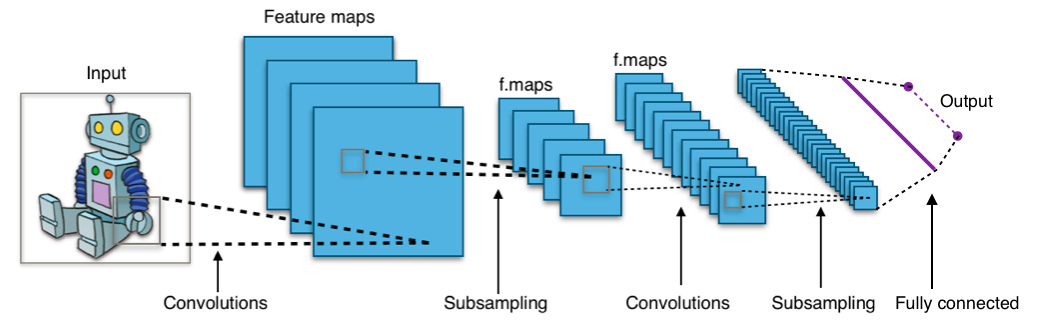

### 최대 풀링과 평균 풀링 중 어떤 게 더 유용할까여?

연구자들은 보통 평균 풀링보다 최대 풀링을 더 선호.

-> 평균 풀링은 합성곱층을 통과하는 특징들을 희석시킬 가능성이 높음

But! 

최대 풀링은 가장 큰 특징을 유지시키는 성질이 있음
-> 이미지 분류작업에 적합

In [0]:
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
x = x.reshape(1, 4, 4, 1)

In [16]:
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6,  8],
       [14, 16]])

### 합성망 신경망의 구조 알아보기

In [0]:
def relu(x):
    return np.maximum(x, 0)

In [18]:
x = np.array([-1, -2, -3, -4, -5])
relu(x)

array([0, 0, 0, 0, 0])

In [19]:
r_out = tf.nn.relu(x)
r_out.numpy() # Tensorflow의 Relu함수는 Tensor객체를 반환하므로 화면에 출력하려면 넘파이로 변환

array([0, 0, 0, 0, 0])

### 합성곱 신경망의 전체구조

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FwbBPv%2FbtqzDs4Cgf0%2Fu8wIHu591broHKbU4D1trK%2Fimg.png)

In [0]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [21]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify = y_train_all, test_size = 0.2, random_state = 42)

In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [25]:
x_train.shape

(48000, 28, 28, 1)

In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [27]:
cn = ConvolutionNetwork(n_kernels = 10, units = 100, batch_size=128, learning_rate = 0.01)
cn.fit(x_train, y_train_encoded, x_val = x_val, y_val = y_val_encoded, epochs = 20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

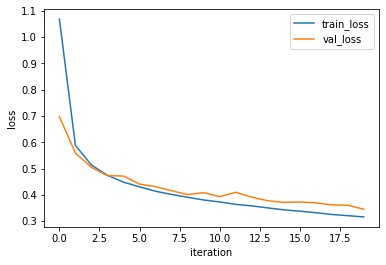

In [28]:
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [29]:
cn.score(x_val, y_val_encoded)

0.8813333333333333

### 케라스로 합성곱 신경망 만들기

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [0]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [0]:
conv1.add(MaxPooling2D((2, 2)))

In [0]:
conv1.add(Flatten())

In [0]:
conv1.add(Dense(100, activation = 'relu'))
conv1.add(Dense(10, activation = 'softmax'))

In [36]:
conv1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = conv1.fit(x_train, y_train_encoded, epochs = 20, validation_data = (x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 185us/sample - loss: 0.4597 - accuracy: 0.8367 - val_loss: 0.3479 - val_accuracy: 0.8773
Epoch 2/20
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3222 - accuracy: 0.8844 - val_loss: 0.3133 - val_accuracy: 0.8889
Epoch 3/20
48000/48000 [==============================] - 8s 170us/sample - loss: 0.2748 - accuracy: 0.9004 - val_loss: 0.2906 - val_accuracy: 0.8975
Epoch 4/20
48000/48000 [==============================] - 8s 169us/sample - loss: 0.2402 - accuracy: 0.9129 - val_loss: 0.2824 - val_accuracy: 0.8982
Epoch 5/20
48000/48000 [==============================] - 8s 168us/sample - loss: 0.2125 - accuracy: 0.9229 - val_loss: 0.2739 - val_accuracy: 0.9006
Epoch 6/20
48000/48000 [==============================] - 8s 168us/sample - loss: 0.1891 - accuracy: 0.9311 - val_loss: 0.2650 - val_accuracy: 0.9080
Epoch 7/20
48000/48000 [==========================

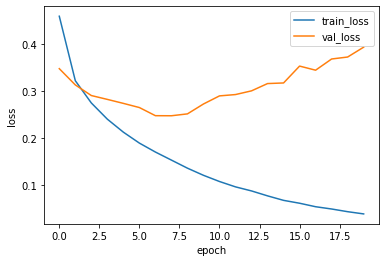

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

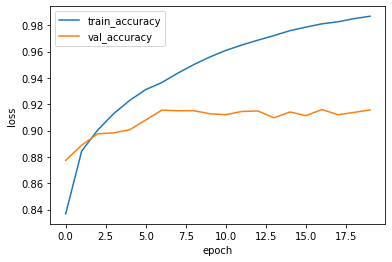

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### 드랍아웃을 알아봅세다!!!

![대체 텍스트](https://img.sbs.co.kr/newimg/news/20170112/201014291_700.jpg)

이거 아니무니다!

In [0]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation = 'relu'))
conv2.add(Dense(10, activation = 'softmax'))

In [43]:
conv2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [44]:
conv2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs = 20, validation_data = (x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 182us/sample - loss: 0.4965 - accuracy: 0.8233 - val_loss: 0.3459 - val_accuracy: 0.8808
Epoch 2/20
48000/48000 [==============================] - 8s 169us/sample - loss: 0.3682 - accuracy: 0.8648 - val_loss: 0.3152 - val_accuracy: 0.8845
Epoch 3/20
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3269 - accuracy: 0.8794 - val_loss: 0.2785 - val_accuracy: 0.8971
Epoch 4/20
48000/48000 [==============================] - 8s 172us/sample - loss: 0.3005 - accuracy: 0.8878 - val_loss: 0.2662 - val_accuracy: 0.9025
Epoch 5/20
48000/48000 [==============================] - 8s 171us/sample - loss: 0.2744 - accuracy: 0.8981 - val_loss: 0.2568 - val_accuracy: 0.9050
Epoch 6/20
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2651 - accuracy: 0.9013 - val_loss: 0.2445 - val_accuracy: 0.9122
Epoch 7/20
48000/48000 [==========================

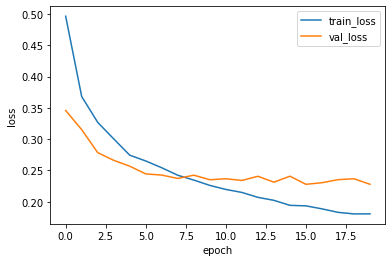

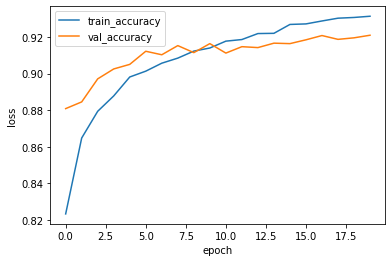

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()